# ALGORITMO NAIVE BAYES

Imports

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
sns.set_style("darkgrid")

# Carregar Database

In [72]:
data = pd.read_csv("Breast_cancer_data.csv")
data.head(10)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
5,12.45,15.70,82.57,477.1,0.12780,0
6,18.25,19.98,119.60,1040.0,0.09463,0
7,13.71,20.83,90.20,577.9,0.11890,0
8,13.00,21.82,87.50,519.8,0.12730,0
9,12.46,24.04,83.97,475.9,0.11860,0


# Algoritmo Naive Bayes com dataset de Cancer de Mama

c:\Users\jvict\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


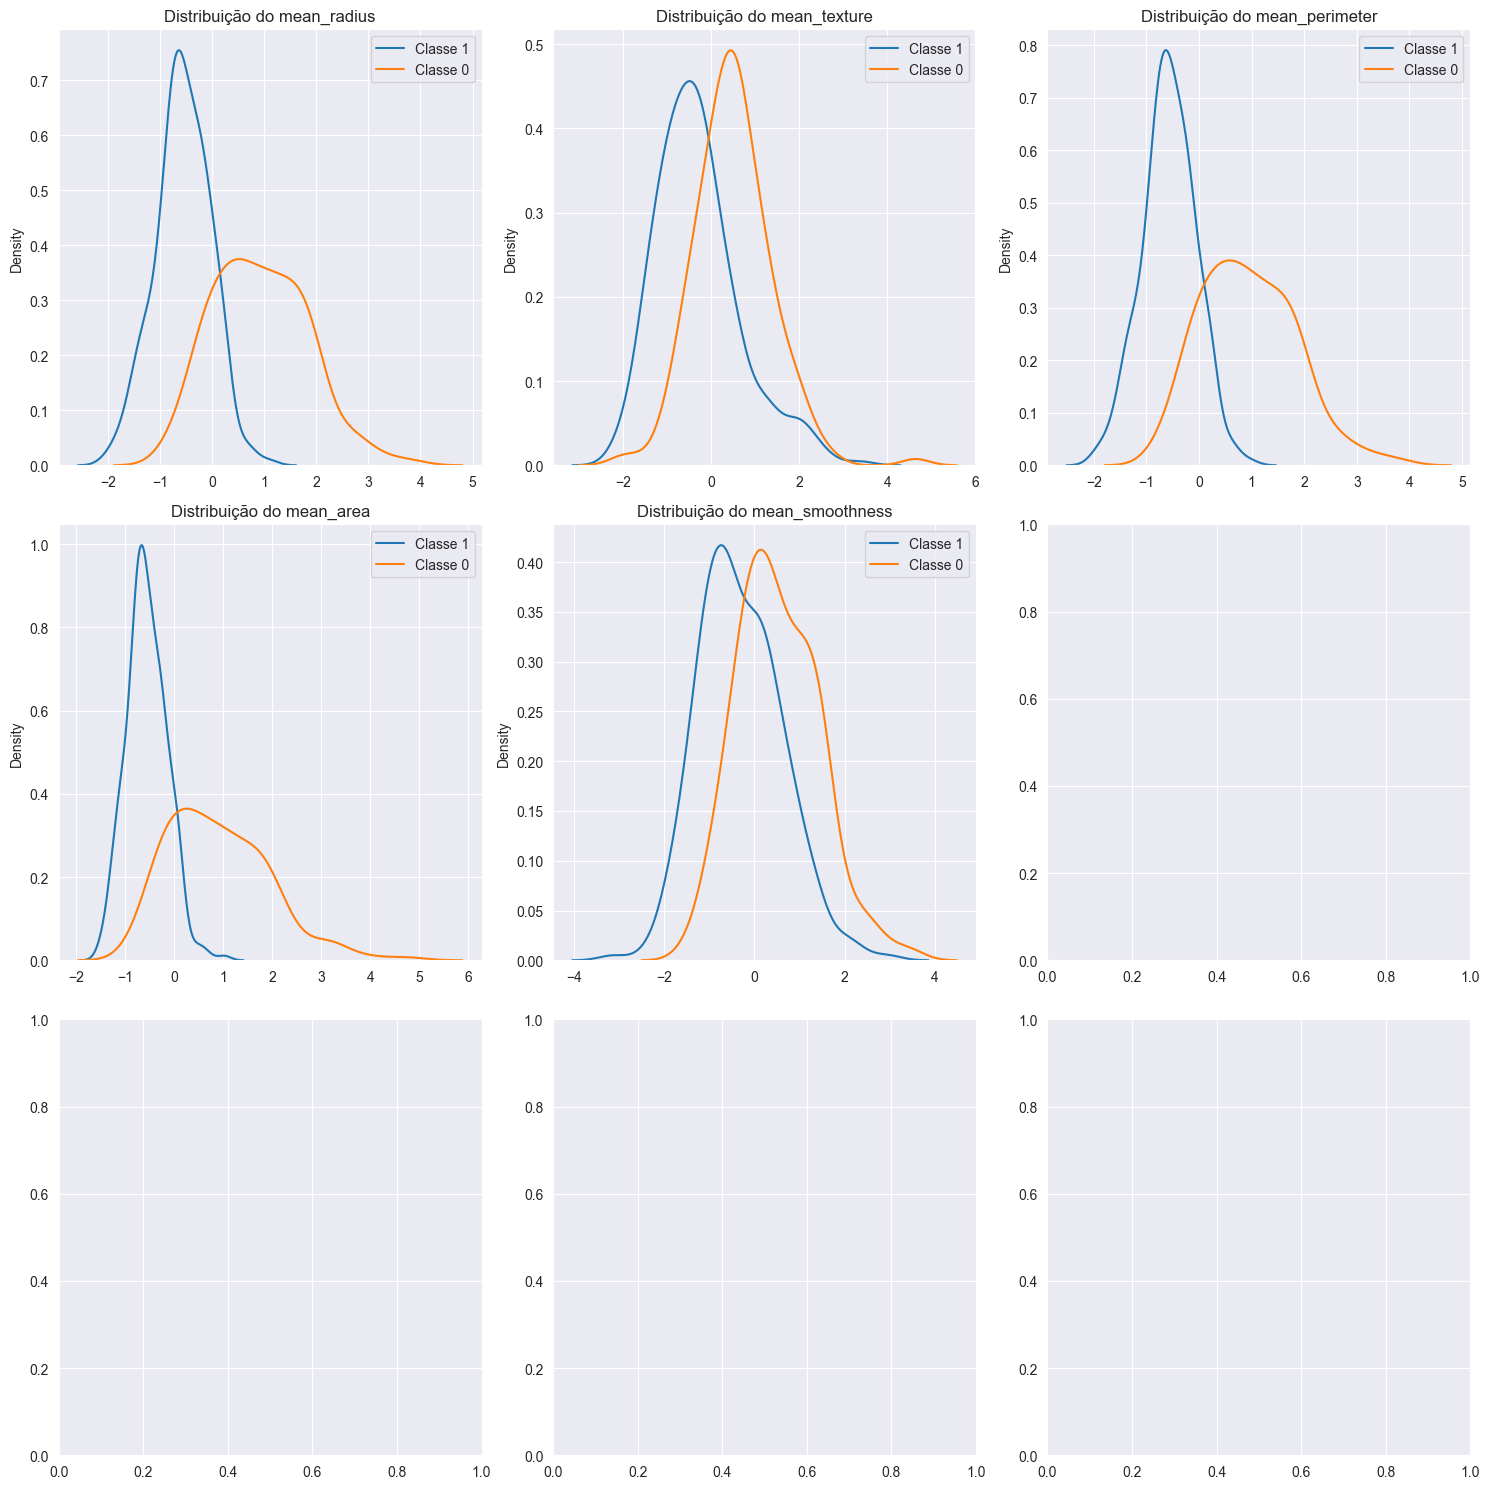

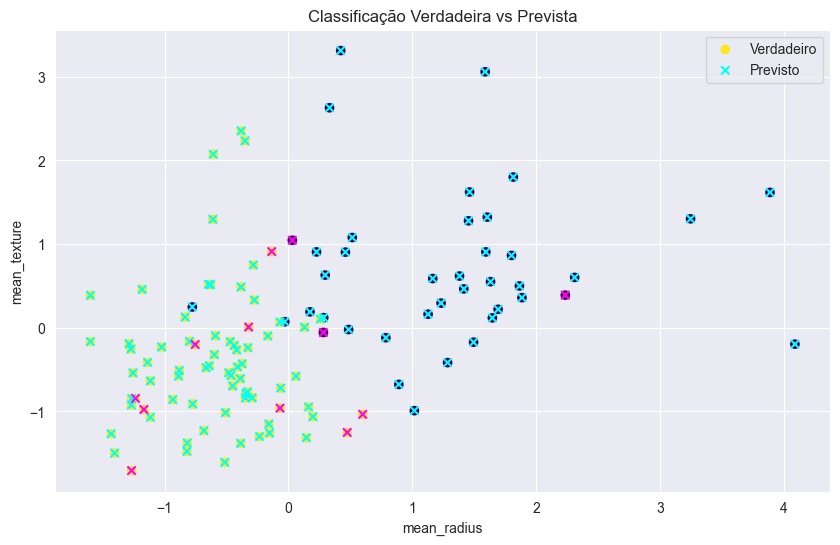

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, f1_score

# Função para calcular prior
def calcular_prior(df, coluna_alvo):
    classes_unicas = sorted(list(df[coluna_alvo].unique()))
    prior_probabilidades = []
    for classe in classes_unicas:
        num_exemplos_classe = len(df[df[coluna_alvo] == classe])
        prior_classe = num_exemplos_classe / len(df)
        prior_probabilidades.append(prior_classe)
    return prior_probabilidades

# Função para calcular likelihood gaussiano
def calcular_likelihood_gaussiana(df, nome_atributo, valor_atributo, coluna_alvo, classe_alvo):
    df_classe_alvo = df[df[coluna_alvo] == classe_alvo]
    media = df_classe_alvo[nome_atributo].mean()
    desvio_padrao = df_classe_alvo[nome_atributo].std()
    p_x_dado_y = (1 / (np.sqrt(2 * np.pi) * desvio_padrao)) * np.exp(-((valor_atributo - media)**2 / (2 * desvio_padrao**2)))
    return p_x_dado_y

# Função para Naive Bayes Gaussiano
def naive_bayes_gaussian(df, X, Y):
    features = list(df.columns)[:-1]
    prior = calcular_prior(df, Y)
    Y_pred = []
    for sample in X:
        labels = sorted(list(df[Y].unique()))
        likelihood = [1] * len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calcular_likelihood_gaussiana(df, features[i], sample[i], Y, labels[j])
        post_prob = [1] * len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]
        Y_pred.append(np.argmax(post_prob))
    return np.array(Y_pred)

# Carregar dados e pré-processamento
data = pd.read_csv("Breast_cancer_data.csv")
# Aqui você pode realizar qualquer pré-processamento necessário, como a discretização de atributos contínuos.

# Dividir dados em treino e teste
train, test = train_test_split(data, test_size=0.2, random_state=41)
X_test = test.iloc[:, :-1].values
Y_test = test.iloc[:, -1].values

# Normalizar os dados
scaler = StandardScaler()
train_data_norm = scaler.fit_transform(train.iloc[:, :-1])
test_data_norm = scaler.transform(X_test)

# Calcular as médias, variâncias e desvios padrão para cada classe
medias = {}
desvios = {}
for classe in np.unique(train['diagnosis']):
    classe_data = train_data_norm[train['diagnosis'] == classe]
    medias[classe] = classe_data.mean(axis=0)
    desvios[classe] = classe_data.std(axis=0)

# Calcular as probabilidades a priori
priors = calcular_prior(train, 'diagnosis')

# Prever as classes para os dados de teste
previsoes = naive_bayes_gaussian(train, X=test_data_norm, Y='diagnosis')

# Visualização das distribuições de probabilidade
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

atributos = train.columns[:-1]
classes = train['diagnosis'].unique()

for i, atributo in enumerate(atributos[:5]):
    row, col = divmod(i, 3)
    for classe in classes:
        sns.kdeplot(train_data_norm[train['diagnosis'] == classe, i], label=f'Classe {classe}', ax=axs[row, col])
    axs[row, col].set_title(f'Distribuição do {atributo}')
    axs[row, col].legend()

plt.tight_layout()
plt.show()

# Visualização da classificação
plt.figure(figsize=(10, 6))

# Usando duas características para visualização 
plt.scatter(test_data_norm[:, 0], test_data_norm[:, 1], c=Y_test, cmap='viridis', marker='o', label='Verdadeiro')
plt.scatter(test_data_norm[:, 0], test_data_norm[:, 1], c=previsoes, cmap='cool', marker='x', label='Previsto')
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.title('Classificação Verdadeira vs Prevista')
plt.legend()
plt.show()

# Calcular a matriz de confusão
cm = confusion_matrix(Y_test, previsoes)

# Contagem de acertos e erros
acertos = np.diag(cm)
erros = np.sum(cm, axis=1) - acertos

# Labels das classes
labels = ['Benigno', 'Maligno']




Algoritmo João e Breno:
Matriz de Confusão:
[[36  4]
 [ 2 72]]
Escore F1: 0.96

GaussianNB do scikit-learn:
Matriz de Confusão:
[[36  4]
 [ 2 72]]
Escore F1: 0.96

Validação Cruzada (F1 Score): [0.93548387 0.90322581 0.8852459  0.91803279 0.8852459  0.94736842
 0.89285714 0.89285714 0.9122807  0.96551724]
Média F1 Score: 0.9138114917483902


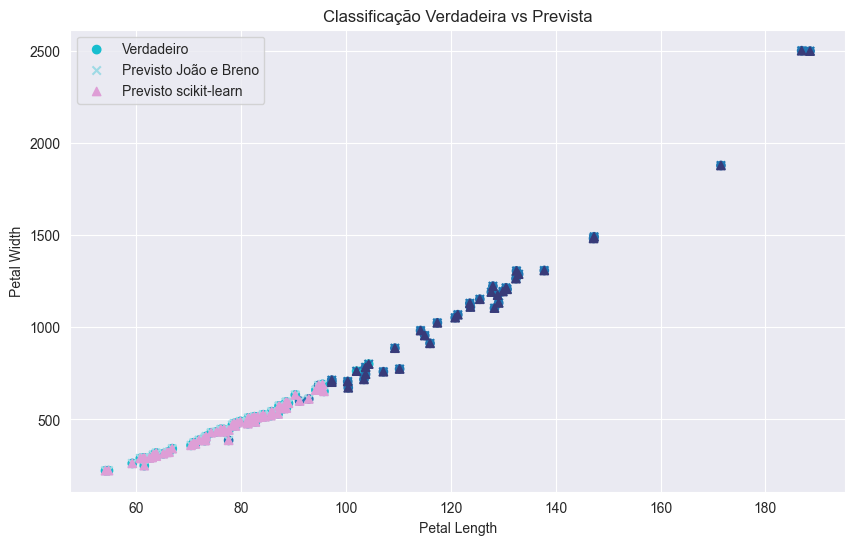

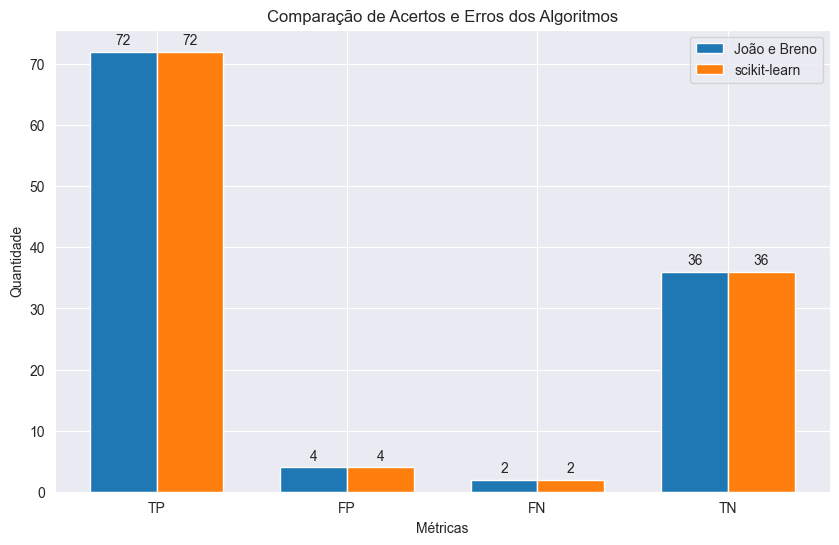

In [74]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.naive_bayes import GaussianNB


# Dividir os dados em conjunto de treinamento e teste
train, test = train_test_split(data, test_size=0.2, random_state=41)

# Extrair os conjuntos de características (X) e alvo (Y) do conjunto de teste
X_train = train.iloc[:, :-1].values
Y_train = train.iloc[:, -1].values
X_test = test.iloc[:, :-1].values
Y_test = test.iloc[:, -1].values

# Chamar a função naive_bayes_gaussian para prever as classes do conjunto de teste
Y_pred_custom = naive_bayes_gaussian(train, X=X_test, Y="diagnosis")

# Calcular e imprimir a matriz de confusão e o escore F1 para o algoritmo meu
print("Algoritmo João e Breno:")
print("Matriz de Confusão:")
print(confusion_matrix(Y_test, Y_pred_custom))
print(f"Escore F1: {f1_score(Y_test, Y_pred_custom)}")
print()

# Comparar com o GaussianNB do scikit-learn
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
Y_pred_sklearn = gnb.predict(X_test)

# Calcular e imprimir a matriz de confusão e o escore F1 para o GaussianNB do scikit-learn
print("GaussianNB do scikit-learn:")
print("Matriz de Confusão:")
print(confusion_matrix(Y_test, Y_pred_sklearn))
print(f"Escore F1: {f1_score(Y_test, Y_pred_sklearn)}")
print()

# Validação cruzada
scores = cross_val_score(gnb, X_train, Y_train, cv=10, scoring='f1')
print(f"Validação Cruzada (F1 Score): {scores}")
print(f"Média F1 Score: {scores.mean()}")

# Visualização da classificação
plt.figure(figsize=(10, 6))

# Usando Petal Length e Petal Width para visualização
plt.scatter(X_test[:, 2], X_test[:, 3], c=Y_test, cmap='tab10', marker='o', label='Verdadeiro')
plt.scatter(X_test[:, 2], X_test[:, 3], c=Y_pred_custom, cmap='tab20', marker='x', label='Previsto João e Breno')
plt.scatter(X_test[:, 2], X_test[:, 3], c=Y_pred_sklearn, cmap='tab20b', marker='^', label='Previsto scikit-learn')

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Classificação Verdadeira vs Prevista')
plt.legend(['Verdadeiro', 'Previsto João e Breno', 'Previsto scikit-learn'])
plt.show()

# Calcular acertos e erros
cm_custom = confusion_matrix(Y_test, Y_pred_custom)
cm_sklearn = confusion_matrix(Y_test, Y_pred_sklearn)

# Verdadeiros Positivos (TP), Falsos Positivos (FP), Falsos Negativos (FN), Verdadeiros Negativos (TN)
TP_custom = cm_custom[1, 1]
FP_custom = cm_custom[0, 1]
FN_custom = cm_custom[1, 0]
TN_custom = cm_custom[0, 0]

TP_sklearn = cm_sklearn[1, 1]
FP_sklearn = cm_sklearn[0, 1]
FN_sklearn = cm_sklearn[1, 0]
TN_sklearn = cm_sklearn[0, 0]

# Dados para o gráfico de barras
labels = ['TP', 'FP', 'FN', 'TN']
custom_values = [TP_custom, FP_custom, FN_custom, TN_custom]
sklearn_values = [TP_sklearn, FP_sklearn, FN_sklearn, TN_sklearn]

x = np.arange(len(labels))  # Posições das barras
width = 0.35  # Largura das barras

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, custom_values, width, label='João e Breno')
bars2 = ax.bar(x + width/2, sklearn_values, width, label='scikit-learn')

# Adicionar alguns detalhes ao gráfico
ax.set_xlabel('Métricas')
ax.set_ylabel('Quantidade')
ax.set_title('Comparação de Acertos e Erros dos Algoritmos')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Mostrar os valores nas barras
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()


### TP -> True Positive | FP -> False Positive | FN -> False Negative | TN -> True Negative